# Data Pre-Processing And Cleaning

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Replacing zeros with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

# Replacing missing values of Glucose and Blood pressure with Mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)

# Replacing missing values of Insulin,BMI and SkinThickness with Median
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)

# Displaying updated dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


C:\Users\kanis\AppData\Local\Temp\ipykernel_3504\885994653.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
C:\Users\kanis\AppData\Local\Temp\ipykernel_3504\885994653.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [7]:
# Scaling the data
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Applying SMOTE for handling class imbalance

In [9]:
%pip install imbalanced-learn

     -------------------------------------- 258.3/258.3 KB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kanis\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


## Applying Multiple AI models and evaluating them

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score
)
import numpy as np

# Define models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Define scoring metrics for evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score),
}

# Perform K-Fold Cross Validation for each model and store results
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    cv_results = cross_validate(model, X_scaled, y, cv=5, scoring=scoring)
    
    # Calculate and print the average scores for each metric
    print(f"Results for {model_name}:")
    print("  Accuracy:", np.mean(cv_results['test_accuracy']))
    print("  Precision:", np.mean(cv_results['test_precision']))
    print("  Recall:", np.mean(cv_results['test_recall']))
    print("  F1-Score:", np.mean(cv_results['test_f1']))
    print("  Kappa:", np.mean(cv_results['test_kappa']))
    print("\n" + "="*50 + "\n")


Evaluating Logistic Regression...
Results for Logistic Regression:
  Accuracy: 0.7708598590951532
  Precision: 0.7244260462898302
  Recall: 0.5597484276729561
  F1-Score: 0.630602221319156
  Kappa: 0.4684104673391629


Evaluating Decision Tree...
Results for Decision Tree:
  Accuracy: 0.7162549868432222
  Precision: 0.6001970302242041
  Recall: 0.5860237596086653
  F1-Score: 0.5912724932465709
  Kappa: 0.3744411063457848


Evaluating Random Forest...
Results for Random Forest:
  Accuracy: 0.7578728461081402
  Precision: 0.6745620181791172
  Recall: 0.6009783368273934
  F1-Score: 0.6336371330797109
  Kappa: 0.45409839442244626




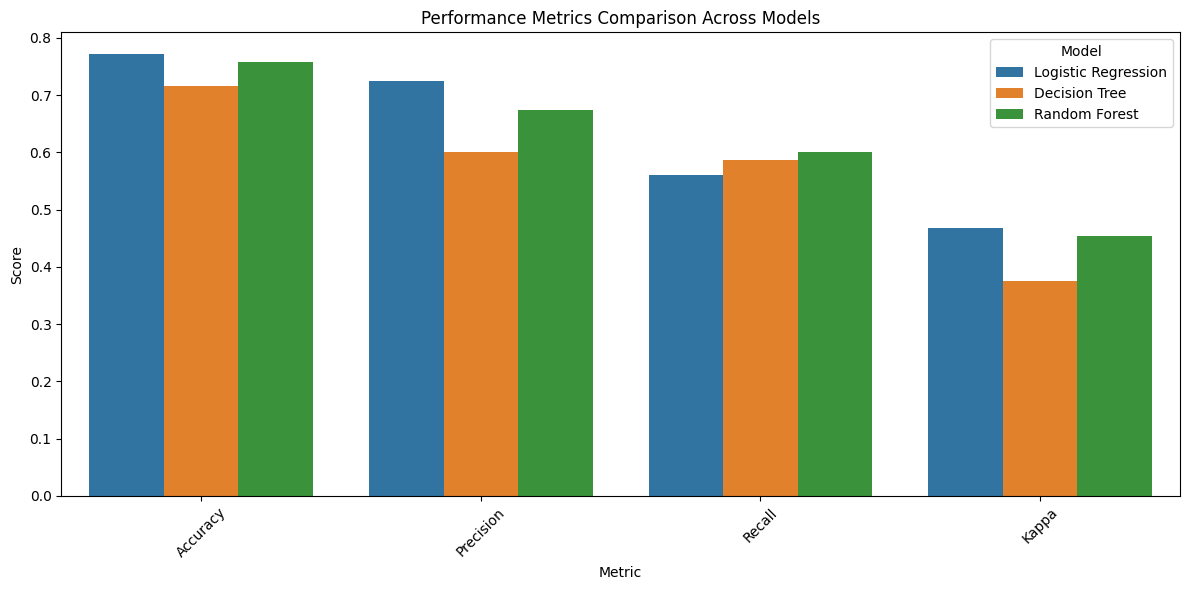

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Performance results for each model
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.7709, 0.7163, 0.7579],
    'Precision': [0.7244, 0.6002, 0.6746],
    'Recall': [0.5597, 0.5860, 0.6010],
    'Kappa': [0.4684, 0.3744, 0.4541]
}

df_results = pd.DataFrame(results)

df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')
plt.title('Performance Metrics Comparison Across Models')
plt.ylabel('Score')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
